#  Introduction and Setup

In [1]:
import numpy as np
import bokeh; print(bokeh.__version__) #版本
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

2.2.1


Loading BokehJS ...

### Getting set up

查看各package的版本

In [2]:
from IPython import __version__ as ipython_version
from pandas import __version__ as pandas_version
from bokeh import __version__ as bokeh_version
print("IPython - %s" % ipython_version)
print("Pandas - %s" % pandas_version)
print("Bokeh - %s" % bokeh_version)

IPython - 7.18.1
Pandas - 0.23.4
Bokeh - 2.2.1


# Basic Plotting (基本繪圖) 

### 1. scatter plot
Bokeh can draw many types of visual shapes (called *glyphs*), including lines, bars, patches, hex tiles and more. 
One of the most common visualization tasks is to draw a scatter plot of data using small *marker* glyphs to represent each point. 

In this section you will see how to use Bokeh's various marker glyphs to create simple scatter plots. 

The basic outline is:
* create a blank figure: `p = figure(...)`
* call a glyph method such as `p.circle` on the figure
* `show` the figure

Execute the cell below to create a small scatter plot with circle glyphs:

In [3]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400,title="scatter plot")

# add a circle renderer with x and y coordinates, size/radius, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

In the output above, you can see the effect of the different options for `line_color`, `fill_alpha`, etc.

There are many marker types available in Bokeh, you can see details and
example plots for all of them in the reference guide by clicking on entries in the list below:

* [asterisk()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.asterisk)
* [circle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle)
* [circle_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_cross)
* [circle_x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_x)
* [cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.cross)
* [diamond()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond)
* [diamond_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond_cross)
* [hex()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.hex)
* [inverted_triangle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.inverted_triangle)
* [square()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square)
* [square_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_cross)
* [square_x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_x)
* [triangle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.triangle)
* [x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.x)

### 2. line plot

Another common visualization task is the drawing of line plots. This can be accomplished in Bokeh by calling the `p.line(...)` glyph method as shown below.

In [4]:
from bokeh.layouts import row
# create a new plot (with a title) using figure
p = figure(plot_width=400, plot_height=400, title="Line Plot")
# add a line renderer
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

q = figure(plot_width=400, plot_height=400, title="Line Plot with dot")
# add a line renderer
q.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
q.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], fill_color="white", size=8)
show(row(p,q))

r = figure(plot_width=400, plot_height=400, title="step plot")
# add a steps renderer
r.step([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(r)

It is possible to combine more than one glyph on a single figure. When multiple calls to glyph methods happen on a single figure, the glyphs are draw in the order called, as shown above(line plot with dot).

In addition to `line_width`, there are other options such as `line_color` or `line_dash` that can be set. Try setting some of the [other properties of line](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.line) and re-running the cell above.

### 3. datetime axes (時間序列)

It's often the case that timeseries data is represented by drawing lines. Let's look at an example using the "glucose" data set, which is available in a Pandas dataframe:

In [5]:
from bokeh.sampledata.glucose import data 
#glucose(葡萄糖資料)
data.head()

,isig,glucose
datetime,,
2010-03-24 09:51:00,22.59,258
2010-03-24 09:56:00,22.52,260
2010-03-24 10:01:00,22.23,258
2010-03-24 10:06:00,21.56,254
2010-03-24 10:11:00,20.79,246


We'd like to plot a subset of this data, and have a nice datetime axis as well. We can ask Bokeh for a datetime axis by passing `x_axis_type="datetime"` to the call to `figure`. This is shown below, as well as configuration of a some other options such as plot dimensions, axis titles, and grid line properies. 

In [6]:
# reduce data size to one week
week = data.loc['2010-10-01':'2010-10-08']
# use x_axis_type to call the datetime axis
p = figure(x_axis_type="datetime", title="Glocose Range", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'
#week.index就是datetime
p.line(week.index, week.glucose)

show(p)

# Styling and Theming (樣式和主題)

Before we get started, it's useful to describe how colors and properties are specified in Bokeh. 

## 1. Colors

There are many places where you may need to specify colors. Bokeh can accept colors in a variety of different ways:

* any of the [140 named HTML/CSS colors](https://www.w3schools.com/colors/colors_names.asp), e.g ``'green'``, ``'indigo'``
* an RGB(A) hex value, e.g., ``'#FF0000'``, ``'#44444444'``
* a 3-tuple of integers *(r,g,b)* between 0 and 255
*  a 4-tuple of *(r,g,b,a)* where *r*, *g*, *b* are integers between 0 and 255 and *a* is a floating point value between 0 and 1



## 2. Properties

Regardless of how a Bokeh plot is created, styling the visual aspects of the plot can always be accomplished by setting attributes on the Bokeh objects that comprise the resulting plot. Visual properties come in three kinds: line, fill, and text properties. For full information with code and examples see the [Styling Visual Properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html) section of the user guide. 

----

### 2-1 Line Properties

Set the visual appearance of lines. The most common are ``line_color``, ``line_alpha``, ``line_width`` and ``line_dash``.

### 2-2 Fill Properties

Set the visual appearance of filled areas: ``fill_color`` and ``fill_alpha``.

### 2-3 Text Properties

Set the visual appearance of lines of text. The most common are ``text_font``, ``text_font_size``, ``text_color``, and ``text_alpha``.

----

Sometimes a prefix is used with property names, e.g. to distinguish between different line properties on the same object, or to give a more meaningful name. For example, to set the line width of the plot outline, you would say ``myplot.outline_line_width = 2``. 

## 3. Plots & Glyphs

Many top-level attributes of plots (outline, border, etc.) can be configured. See the [Plots](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#plots) section of the styling guide for full information. 

It's also possible to style the visual properties of glyphs (see the [Glyphs](https://docs.bokeh.org/en/latest/docs/user_guide/styling.html#glyphs) section of the styling guide for more information). When using `bokeh.plotting` this is often done when calling the glyph methods:
```python
p.circle(line_color="red", fill_alpha=0.2, ...)
```
But it is also possible to set these properties directly on glyph objects. Glyph objects are found on `GlyphRenderer` objects, which are returned by the `Plot.add_glyph` and `bokeh.plotting` glyph methods like `circle`, `rect`, etc. Let's look at an example:

In [7]:
p = figure(plot_width=400, plot_height=400, title="Select a circle")
r = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50)

#plot styling
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"

# keep a reference to the returned GlyphRenderer
r.glyph.size = 50
r.glyph.fill_alpha = 0.2
r.glyph.line_color = "firebrick"
r.glyph.line_dash = [5, 1]#實心長度:5　空白長度：１
r.glyph.line_width = 2

show(p)

### 3-1 Selection and non-selection visuals

**用於強調特定資料**

You can also control how glyphs look when there are selections involved. The set of "selected" points is displayed according to the optional `.selection_glyph` property of a `GlyphRenderer`:
```python
r.selection_glyph = Circle(fill_alpha=1, fill_color="firebrick", line_color=None) 
```
When there is a non-empty selection, the set of "unselected" points is displayed according to the optional `.nonselection_glyph` property of a `GlyphRenderer`:
```python
r.nonselection_glyph = Circle(fill_alpha=0.2, fill_color="grey", line_color=None) 
```

When using the `bokeh.plotting` interface, it is easier to pass these visual properties to the glyph methods as shown below. The glyph method will create the selection or nonselection glyphs and attach them to the renderer for you. 

In [8]:
p = figure(plot_width=400, plot_height=400, tools="tap", title="Select a circle")
renderer = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50,

                    # set visual properties for selected glyphs
                    selection_color="firebrick",

                    # set visual properties for non-selected glyphs
                    nonselection_fill_alpha=0.2,
                    nonselection_fill_color="grey",
                    nonselection_line_color="firebrick",
                    nonselection_line_alpha=1.0)

show(p)

### 3-2 hover tool

It is also possible to specify the visual appearance of glyphs when they are "inspected", e.g. by a hover tool. This is accomplished by setting an optional `hover_glyph` on the glyph renderer:
```python
r.hover_glyph = Circle(fill_alpha=1, fill_color="firebrick", line_color=None) 
```
Or if using `bokeh.plotting` glyph methods, by passing `hover_fill_alpha`, etc. to the glyph method. Lets look at an example that works together with a `HoverTool` configured for "hline" hit-testing.

In [9]:
from bokeh.models.tools import HoverTool 
from bokeh.sampledata.glucose import data
from bokeh.layouts import row

subset = data.loc['2010-10-06']
x, y = subset.index.to_series(), subset['glucose']
# Basic plot setup
p = figure(width=700, height=500, x_axis_type="datetime", title='Hover over points')
p.line(x, y, line_dash="4 4", line_width=1, color='gray')
#hover
cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")
p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(p)

## 4. Axis properties & Grid

Axes objects have many configurable properties that afford control over most visual aspects of an axis. These can be grouped by function according to prefix:

* **axis**  [line properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties) e.g `axis_line_width`

* **axis_label** [text properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#text-properties)  e.g. `axis_label_text_color`, as well as ``axis_label_standoff``

* **major_label** [text properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#text-properties) e.g. `major_label_text_font_size`, as well as ``major_label_orientation``

* **major_tick** [line_properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties) e.g. `major_tick_line_dash`, as well as  ``major_tick_in`` and ``major_tick_out``

* **minor_tick** [line properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties) e.g. `minor_tick_line_width`, as well as ``minor_tick_in`` and ``minor_tick_out``
---
It is also possible to control the [styling of Grids](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#grids)

Grids properties in Bokeh have two possible prefixes:

* **grid** properties (which are [line properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#line-properties)) control the "grid lines"
* **band** properties (which are [fill properties](https://bokeh.pydata.org/en/latest/docs/user_guide/styling.html#fill-properties)) control shaded bands between grid lines

In [10]:
from math import pi

p = figure(plot_width=400, plot_height=400)
p.asterisk([1,2,3,4,5], [2,5,8,2,7], size=12, color="olive")

# change just some things about the x-axes
p.xaxis.axis_line_width = 3
p.xaxis.axis_label = "Temp"
p.xaxis.axis_line_color = "red"
p.xaxis.major_label_orientation = pi/4

# change just some things about the y-axes
p.yaxis.axis_label = "Pressure"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"#刻度的方向

# change things on all axes 
p.axis.minor_tick_in = 2
p.axis.minor_tick_out = 6

# change just some things about the x-grid(turn off the vertical grid lines)
p.xgrid.grid_line_color = None

# change just some things about the y-grid
p.ygrid.band_fill_alpha = 0.1
p.ygrid.band_fill_color = "navy"

show(p)

### 4-1 Axis : tick labels

All Bokeh axes have a `formatter` property, whose value is a `TickFormatter` object that Bokeh uses to format the ticks displayed by that axis. Bokeh will configure default tick formatters for numeric, datetime, or categotical axes. But often we would like to customize the appearance of tick labels. This can be accomplished by changing properties on the default formatter that Bokeh chooses, or by replacing the formatter with a new type entirely. 

Let's first look at changing the properties of a default formatter. The default datetime formatter is configured to show *month/day* when the axis is on the scale of days. If would like the also always show the year, we can change the `days` property to a format that includes the year, as done below. 

In [11]:
week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Glocose Range", plot_height=350, plot_width=800)
p.xaxis.formatter.days = '%m/%d/%Y'
p.xaxis.major_label_orientation = pi/3

p.line(week.index, week.glucose)

show(p)

# Adding Annotations

## 1. Spans & Box Annotation

`Spans` are "infinite" vertical or horizonal lines. When creating them, you specify the `dimension` that should be spanned (i.e., `width` or `height`), any visual line properties for the appearance, and the location along the dimension where the line should be drawn.

---

Sometimes you might want to call out some region of the plot by drawing a shaded box. This can be done with the `BoxAnnotation`, which is configured with the coordinate properties:
* `top`
* `left`
* `bottom`
* `right`

as well as any visual line or fill properties to control the appearance. 

"Infinite" boxes can be made by leaving any of the coordinates unspecified. E.g., if `top` is not given, the box will always extend to the top of the plot area, regardless of any panning or zooming that happens.

In [12]:
import numpy as np
from bokeh.models.annotations import Span
from bokeh.models.annotations import Label
from bokeh.plotting import figure
from bokeh.models.annotations import BoxAnnotation

x = np.linspace(0, 20, 200)
y = np.sin(x)
p = figure(y_range=(-2, 2),width=400, height=400)
p.line(x, y)
left = Span(location=1, dimension='height', line_color='olive', line_width=4)
p.add_layout(left)
lower = Span(location=-1, dimension='width', line_color='firebrick', line_width=4)
p.add_layout(lower)

# region that always fills the top of the plot
upper = BoxAnnotation(bottom=1, fill_alpha=0.1, fill_color='olive')  #bottom=1 :１是最底下，所以填滿１之上
p.add_layout(upper)
# region that always fills the bottom of the plot
lower = BoxAnnotation(top=-1, fill_alpha=0.1, fill_color='firebrick')
p.add_layout(lower)
# a finite region
center = BoxAnnotation(top=0.6, bottom=-0.3, left=7, right=12, fill_alpha=0.1, fill_color='navy')
p.add_layout(center)


show(p)

## 2. Label

The `Label` annotation allows you to easily attach single text labels to plots. The position and text to display are configured as `x`, `y`, and `text`:

```python
Label(x=10, y=5, text="Some Labels")
```

By default the units are in "data space" but `x_units` and `y_units` maybe set to `"screen"` to position the label relative to the canvas. Labels can also accept `x_offset` and `y_offset` to offset the final position from `x` and `y` by a given screen space distance.

`Label` objects also have standard text, line (`border_line`) and fill (`background_fill`) properties.


In [13]:
q = figure(x_range=(0,10), y_range=(0,10),width=400, height=400)
q.circle([2, 5, 8], [4, 7, 6], color="olive", size=10)

# x_offset:點和label的距離
label = Label(x=5, y=7, text="Some Labels", text_font_size="12pt", 
              border_line_color="red", background_fill_color="yellow", x_offset=10, text_baseline="middle")
q.add_layout(label)

show(q)

## 3. Arrows

The `Arrow` annotation allows you to "point" at different things on your plot, and can be especially useful in conjuction with labels. 

For example, to create an arrow that points from `(0,0)` to `(1,1)`:

```python
p.add_layout(Arrow(x_start=0, y_start=0, x_end=1, y_end=0))
```

This arrow will have the default [`OpenHead`](https://bokeh.pydata.org/en/latest/docs/reference/models/arrow_heads.html#bokeh.models.arrow_heads.OpenHead) arrow head at the end of the arrow. Other kinds of arrow heads include [`NormalHead`](https://bokeh.pydata.org/en/latest/docs/reference/models/arrow_heads.html#bokeh.models.arrow_heads.NormalHead) and [`VeeHead`](https://bokeh.pydata.org/en/latest/docs/reference/models/arrow_heads.html#bokeh.models.arrow_heads.VeeHead). The arrow head type can be controlled by setting the `start` and `end` properties of `Arrow` objects:

```python
p.add_layout(Arrow(start=OpenHead(), end=VeeHead(), 
             x_start=0, y_start=0, x_end=1, y_end=0))
```

This will create a double-ended arrow with an "open" head at the start, and a "vee" head at the end. Arrowheads have the standard set of line and fill properties to control their appearance. As an example

```python
OpenHead(line_color="firebrick", line_width=4)
```

The code and plot below shows several of these configurations together.

In [14]:
from bokeh.models.annotations import Arrow
from bokeh.models.arrow_heads import OpenHead, NormalHead, VeeHead

p = figure(plot_width=600, plot_height=600)

p.circle(x=[0, 1, 0.5], y=[0, 0, 0.7], radius=0.1,
         color=["navy", "yellow", "red"], fill_alpha=0.1)
#OpenHead
p.add_layout(Arrow(end=OpenHead(line_color="firebrick", line_width=4),
                   x_start=0, y_start=0, x_end=1, y_end=0))
#NormalHead
p.add_layout(Arrow(end=NormalHead(fill_color="orange"),
                   x_start=1, y_start=0, x_end=0.5, y_end=0.7))
#VeeHead
p.add_layout(Arrow(end=VeeHead(size=35), line_color="red",
                   x_start=0.5, y_start=0.7, x_end=0, y_end=0))

show(p)

## 4. Legends

When plots have multiple glyphs, it is desirable to include a legend to help users interpret what they see. Bokeh can generate legends easily based on the glyphs that are added. 

In [15]:
import numpy as np

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

p = figure(height=400)
#legend_label
p.circle(x, y, legend_label="sin(x)")
p.line(x, 2*y, legend_label="2*sin(x)", line_dash=[4, 4], line_color="orange", line_width=2)


show(p)

## 5. Color Bars


Color bars are especially useful if we vary the color of a glyph according to some color mapping. Bokeh color bars are configured with a color mapper and added to plots with the `add_layout` method:
```python
color_mapper = LinearColorMapper(palette="Viridis256", low=data_low, high=data_high)
color_bar = ColorBar(color_mapper=color_mapper, location=(0,0))
p.add_layout(color_bar, 'right')

```
The example below shows a complete example that also uses the color mapper to transform the glyph color.

In [16]:
from bokeh.sampledata.autompg import autompg
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform
from bokeh.models import ColumnDataSource, LabelSet

source = ColumnDataSource(autompg)
color_mapper = LinearColorMapper(palette="Viridis256", low=autompg.weight.min(), high=autompg.weight.max())

p = figure( x_axis_label='MPG',y_axis_label='Horsepower', tools='', toolbar_location=None)
p.circle(x='mpg', y='hp', color=transform('weight', color_mapper), size=20, alpha=0.6, source=autompg)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Weight')
p.add_layout(color_bar, 'right')

show(p)

# Linking and Interactions

### Rows and Columns
The `bokeh.layouts` modules provides the ``row`` and ``column`` functions to arrange plot objects in vertical or horizontal layouts. Below is an example of three plots arranged in a row.

In [17]:
from bokeh.layouts import row
x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# show the results in a row
show(row(s1, s2, s3))

### Grid plots

Bokeh also provides a `gridplot` layout in `bokeh.layouts` for arranging plots in a grid, as show in the example below.

In [18]:
from bokeh.layouts import gridplot

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in a gridplot
p = gridplot([[s1, s2], [s3, None]], toolbar_location=None)

# show the results
show(p)

## 1. Linked Interactions

It is possible to link various interactions between different Bokeh plots. For instance, the ranges of two (or more) plots can be linked, so that when one of the plots is panned (or zoomed, or otherwise has its range changed) the other plots will update in unison. It is also possible to link selections between two plots, so that when items are selected on one plot, the corresponding items on the second plot also become selected. 

### 1-1 Linked panning
The `bokeh.layouts` modules provides the ``row`` and ``column`` functions to arrange plot objects in vertical or horizontal layouts. Below is an example of three plots arranged in a row.

In [19]:
from bokeh.layouts import gridplot

x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

plot_options = dict(width=250, plot_height=250, tools='pan,wheel_zoom')

# create a new plot
s1 = figure(**plot_options)
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

### 1-2 Linked brushing
Linking selections is accomplished in a similar way, by sharing data sources between plots. Note that normally with ``bokeh.plotting`` and ``bokeh.charts`` creating a default data source for simple plots is handled automatically. However to share a data source, we must create them by hand and pass them explicitly. This is illustrated in the example below:

In [20]:
from bokeh.models import ColumnDataSource

x = list(range(-20, 21))
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

## 2. Hover tool
Bokeh has a Hover Tool that allows additional information to be displayed in a popup whenever the user hovers over a specific glyph. Basic hover tool configuration amounts to providing a list of ``(name, format)`` tuples. The full details can be found in the User's Guide [here](https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool).

The example below shows some basic usage of the Hover tool with a circle glyph, using hover information defined in utils.py:

In [21]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

## 3. Widgets
Bokeh supports direct integration with a small basic widget set. These can be used in conjunction with a Bokeh Server, or with ``CustomJS`` models to add more interactive capability to your documents. You can see a complete list, with example code in the [Adding Widgets](https://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#adding-widgets) section of the User's Guide. 



*NOTE: In this Tutorial chapter, we will focus on using widgets with JavaScript callbacks. The Tutorial chapter on Bokeh server applications covers using Bokeh widgets with real Python callbacks*




To use the widgets, include them in a layout like you would a plot object:

In [22]:
from bokeh.models.widgets import Slider


slider = Slider(start=0, end=10, value=1, step=.1, title="foo")

show(slider)

## 4. CustomJS Callbacks

In order for a widget to be useful, it needs to be able to perform some action. Using the Bokeh server, it is possible to have widgets trigger real Python code. That possibility will be explored in the Bokeh server chapter of the turorial. Here, we look at how widgets can be configured with `CustomJS` callbacks that execute snippets of JavaScript code. 

In [23]:
from bokeh.models import TapTool, CustomJS, ColumnDataSource

callback = CustomJS(code="alert('you tapped a circle!')")
tap = TapTool(callback=callback)

p = figure(plot_width=600, plot_height=300, tools=[tap])

p.circle(x=[1, 2, 3, 4, 5], y=[2, 5, 8, 2, 7], size=20)

show(p)

## Slider + Widget example (CustomJS)
The example below shows an action attached to a slider that updates a data source whenever the slider is moved.  

In [24]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

---

# Data Sources and Transformations

### Overview

Bokeh can work well with **Python lists**, **NumPy arrays**, **Pandas series**.
At lower levels, these inputs are converted to a Bokeh `ColumnDataSource`. 
This data type is the central data source object used throughout Bokeh.
 
* 1.Python Dicts
* 2.Pandas DataFrames

## Creating with Python Dicts

The `ColumnDataSource` can be imported from `bokeh.models`:

In [25]:
from bokeh.models import ColumnDataSource

The `ColumnDataSource` is a mapping of column names (strings) to sequences of values. 

The mapping is provided by passing a Python `dict` with string keys and simple Python lists as values. 
The values could also be NumPy arrays, or Pandas sequences.

***NOTE:   ALL the columns in a `ColumnDataSource` must always be the SAME length.***

In [26]:
source = ColumnDataSource(data={
    'x' : [1, 2, 3, 4, 5],
    'y' : [3, 7, 8, 5, 1],             ##ALL the columns have the SAME length
})

p = figure(plot_width=400, plot_height=400)
p.circle('x', 'y', size=20, source=source)
#show(p)

GlyphRenderer(id='6955', ...)

## Creating with Pandas DataFrames

In [27]:
from bokeh.sampledata.iris import flowers as df    ##import dataframe

In [28]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [29]:
p = figure(plot_width=400, plot_height=400)
p.circle('petal_length', 'petal_width', source=df)
show(p)

# Transformations

### bokeh.transform
In addition to being configured with names of columns from data sources, glyph properties may also be configured with transform objects that represent transformations of columns. These live in the `bokeh.transform` module. 

It is important to note that when doing using these objects, the tranformations occur *in the browser, not in Python*. 

* 1. cumsum
* 2. linear_cmap

### 1. cumsum

The first transform we look at is the `cumsum` transform, which can generate a new sequence of values from a data source column by cumulatively summing the values in the column. This can be usefull for **pie** or **donut type charts** .

In [30]:
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
import pandas as pd
from math import pi

x = { 'United States': 157, 'United Kingdom': 93, 'Japan': 89, 'China': 63,
      'Germany': 44, 'India': 42, 'Italy': 40, 'Australia': 35, 'Brazil': 32,
      'France': 31, 'Taiwan': 31, 'Spain': 29 }

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['color'] = Category20c[len(x)]

# represent each value as an angle = value / total * 2pi
data['angle'] = data['value']/data['value'].sum() * 2*pi     #2*pi=360

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value")

p.wedge(x=0, y=1, radius=0.4,    ## radius :pie chart's size     #楔, 角角　扇形　
        
        # use cumsum to cumulatively sum the values for start and end angles
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),#  start_angle：每個善形起始
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label=None
p.axis.visible=False  ##x,y axis
p.grid.grid_line_color =None #grid line格線

show(p)

### 2. linear_cmap

The next transform we look at is the `linear_cmap` transform, which can generate a **new sequence of colors** by applying a linear colormapping to a data source column. 

In [31]:
from bokeh.transform import linear_cmap

N = 4000
data = dict(x=np.random.random(size=N) * 100,
            y=np.random.random(size=N) * 100,
            r=np.random.random(size=N) * 1.5) ##radius='r'

p = figure()

p.circle('x', 'y', radius='r', source=data, fill_alpha=0.6,
        
         # color map based on the x-coordinate
         color=linear_cmap('x', 'Viridis256', 0, 100))

show(p) 

#  Bar and Categorical Data Plots

# Bar

## 1. Basic Bar Charts
* `vbar (vertical bars) `
* `hbar (horizontal bars)`

 We pass the ordered list of categorical values to `figure`
 e.g. `x_range=['a', 'b', 'c']`. 
 
 In the plot below, we passed the list of fruits as `x_range`
 
 The `vbar` glyph method takes an `x` location for the center of the bar, a `top` and `bottom` (which defaults to 0), and a `width`.
 
  When we are using a categorical range as we are here, each category implicitly has width of 1, so setting `width=0.9` as we have done here makes the bars shrink away from each other. (Another option would be to add some padding to the range.)

In [32]:
# Here is a list of categorical values (or factors)
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries'] 

# Set the x_range to the list of categories above
p = figure(x_range=fruits, plot_height=250, title="Fruit Counts")

# Categorical values can also be used as coordinates
p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)  ##width=1時， bar 會連在一起

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0 #y axis

show(p)

Since vbar is a *glyph method*, we can use it with a `ColumnDataSource` just as we would with any other glyph.

In [33]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, plot_height=250, y_range=(0, 9), title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, color='color', legend_field="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

## 2. Stacked Bars
* `vbar_stack`
* `hbar_stack`

When passing data to one of these methods, the **data source** should **have a series for each "row" in the stack**. You will provide an ordered list of column names to stack together from the data source. 

In the example below, we see simulated data for fruit exports (positive values) and imports (negative values) stacked using two calls to `hbar_stack`. The values in the columns for each year are ordered according to the `fruits`, i.e. this is not a "tidy" data format.

In [34]:
from bokeh.palettes import GnBu3, OrRd3

years = ['2015', '2016', '2017']

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p = figure(y_range=fruits, plot_height=250, x_range=(-16, 16), title="Fruit import/export, by year")

p.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports),
             legend_label=["%s exports" % x for x in years])

p.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
             legend_label=["%s imports" % x for x in years])

p.y_range.range_padding = 0.1 #  added some padding around the categorical range (at both ends of the axis)
p.ygrid.grid_line_color = None
p.legend.location = "center_left"

show(p)

## 3. Grouped Bar Charts
Sometimes we want to group bars together, instead of stacking them.
Bokeh can handle up to **three levels** of nested (hierarchical) categories, and will automatically group output according to the outermost level.
To specify neted categorical coordinates, **the columns of the data source should contain tuples**, for example:

    x = [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ] # 2 neted 
Values in other columns correspond to each item in `x`, exactly as in other cases. When plotting with these kinds of nested coordinates, we must tell Bokeh the contents and order the axis range, by explicitly passing a `FactorRange` to `figure`. In the example below, this is seen as

    p = figure(x_range=FactorRange(*x), ....)

In [35]:
from bokeh.models import FactorRange

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Fruit Counts by Year")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

# Categorical Data Plots

## 1. Mixing Categorical Levels
* Using Pandas `GroupBy`

If you have created a range with nested categories, it is possible to plot glyphs using only the "outer" categories, if desired. The plot below shows monthly values grouped by quarter as bars. The data for these are in the famliar format:

    factors = [("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"), ....]

The plot also overlays a line representing average quarterly values, and this is accomplished by using only the "quarter" part of each nexted category:

    p.line(x=["Q1", "Q2", "Q3", "Q4"], y=....)

In [36]:
from bokeh.models import FactorRange
factors = [("Q1", "jan"), ("Q1", "feb"), ("Q1", "mar"),
           ("Q2", "apr"), ("Q2", "may"), ("Q2", "jun"),
           ("Q3", "jul"), ("Q3", "aug"), ("Q3", "sep"),
           ("Q4", "oct"), ("Q4", "nov"), ("Q4", "dec")] #每個資料的細節寫在ＴＵＰＬＥ中，再填再ＬＩＳＴ裡

p = figure(x_range=FactorRange(*factors), plot_height=250)   ## *:list **:dictionary

x = [ 10, 12, 16, 9, 10, 8, 12, 13, 14, 14, 12, 16 ]
p.vbar(x=factors, top=x, width=0.9, alpha=0.5)

qs, aves = ["Q1", "Q2", "Q3", "Q4"], [12, 9, 13, 14]
p.line(x=qs, y=aves, color="red", line_width=3)
p.circle(x=qs, y=aves, line_color="red", fill_color="white", size=10)

p.y_range.start = 0
p.x_range.range_padding = 0.1  ##左右兩側空間
p.xgrid.grid_line_color = None

show(p)

### Using Pandas `GroupBy`

We may want to make charts based on the results of "group by" operations. Bokeh can utilize Pandas `GroupBy` objects directly to make this simpler. Let's take a look at how Bokeh deals with `GroupBy` objects by examining the "cars" data set.

In [37]:
from bokeh.sampledata.autompg import autompg_clean as df

df.cyl = df.cyl.astype(str) #astype()資料類型轉換
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


Suppose we would like to display some values grouped according to `"cyl"`. If we create `df.groupby(('cyl'))` then call `group.describe()` we can see that Pandas automatically computes various statistics for each group. 

In [38]:
group = df.groupby(('cyl'))

group.describe()

accel                                                      displ  \
     count       mean       std   min    25%   50%   75%   max  count   
cyl                                                                     
3      4.0  13.250000  0.500000  12.5  13.25  13.5  13.5  13.5    4.0   
4    199.0  16.581910  2.383185  11.6  14.80  16.2  18.0  24.8  199.0   
5      3.0  18.633333  2.369247  15.9  17.90  19.9  20.0  20.1    3.0   
6     83.0  16.254217  2.031778  11.3  15.05  16.0  17.6  21.0   83.0   
8    103.0  12.955340  2.224759   8.0  11.50  13.0  14.0  22.2  103.0   

                 ...   weight             yr                             \
           mean  ...      75%     max  count       mean       std   min   
cyl              ...                                                      
3     72.500000  ...   2495.0  2720.0    4.0  75.500000  3.696846  72.0   
4    109.670854  ...   2562.5  3270.0  199.0  77.030151  3.737484  70.0   
5    145.000000  ...   3240.0  3530.0    3.0  79.000000  1.000000  78.0   
6    218.361446  ...   3431.0  3907.0   83.0  75.951807  3.264381  70.0   
8    345.009709  ...   4403.5  5140.0  103.0  73.902913  3.021214  70.0   

                               
       25%   50%    75%   max  
cyl                            
3    72.75  75.0  77.75  80.0  
4    74.00  77.0  80.00  82.0  
5    78.50  79.0  79.50  80.0  
6    74.00  76.0  78.00  82.0  
8    72.00  73.0  76.00  81.0  

[5 rows x 48 columns]

Bokeh allows us to create a `ColumnDataSource` directly from Pandas `GroupBy` objects, and when this happens, the data source is automatically filled with the summary values from `group.desribe()`. Observe the column names below, which correspond to the output above.

In [39]:
from bokeh.models import ColumnDataSource
source = ColumnDataSource(group)

",".join(source.column_names)# LIST->TUPLE

'cyl,accel_count,accel_mean,accel_std,accel_min,accel_25%,accel_50%,accel_75%,accel_max,displ_count,displ_mean,displ_std,displ_min,displ_25%,displ_50%,displ_75%,displ_max,hp_count,hp_mean,hp_std,hp_min,hp_25%,hp_50%,hp_75%,hp_max,mpg_count,mpg_mean,mpg_std,mpg_min,mpg_25%,mpg_50%,mpg_75%,mpg_max,weight_count,weight_mean,weight_std,weight_min,weight_25%,weight_50%,weight_75%,weight_max,yr_count,yr_mean,yr_std,yr_min,yr_25%,yr_50%,yr_75%,yr_max'

Knowing these column names, we can immediately create bar charts based on Pandas GroupBy objects. The example below plots the aveage MPG per cylinder, i.e. columns "mpg_mean" vs "cyl"

In [40]:
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap
df.cyl = df.cyl.astype(str)
group = df.groupby(('cyl'))
from bokeh.palettes import Spectral5

cyl_cmap = factor_cmap('cyl', palette=Spectral5, factors=sorted(df.cyl.unique())) 
##unique.()去除其中重複的元素，並按元素由大到小返回一個新的無元素重複的元組或者列表

p = figure(plot_height=350, x_range=group)
p.vbar(x='cyl', top='mpg_mean', width=0.9, line_color="white", 
       fill_color=cyl_cmap, source=source)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "number of cylinders"
p.yaxis.axis_label = "Mean MPG"
p.y_range.start = 0

show(p)

## 2. Catgorical Scatterplots

So far we have seen Categorical data used together with various bar glyphs. But Bokeh can use categorical coordinates for most any glyphs. Let's create a scatter plot with categorical coordinates on one axis. The `commits` data set simply has a series datetimes of GitHub commit. Additional columns to express the day and hour of day for each commit have already been added.

In [41]:
from bokeh.sampledata.commits import data
data.head()

,day,time
datetime,,
2017-04-22 15:11:58-05:00,Sat,15:11:58
2017-04-21 14:20:57-05:00,Fri,14:20:57
2017-04-20 14:35:08-05:00,Thu,14:35:08
2017-04-20 10:34:29-05:00,Thu,10:34:29
2017-04-20 09:17:23-05:00,Thu,09:17:23


To create our scatter plot, we pass the list of categories as the range just as before

    p = figure(y_range=DAYS, ...)
    
Then we can plot circles for each commit, with `"time"` driving the x-coordinate, and `"day"` driving the y-coordinate.

    p.circle(x='time', y='day', ...)

To make the values more distinguishable, we can also add a `jitter` transform to the y-coordinate, which is shown in the complete example below.

In [42]:
from bokeh.transform import jitter

DAYS = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon'] 

source = ColumnDataSource(data)

p = figure(plot_width=800, plot_height=300, y_range=DAYS, x_axis_type='datetime', 
           title="Commits by Time of Day (US/Central) 2012—2016")

p.circle(x='time', y=jitter('day', width=0.65, range=p.y_range),  source=source, alpha=0.3)#jitter transform資料　讓資料更容易閱讀
p.circle(x='time', y='day',  source=source, alpha=0.4,color="green")#直接plot scatterplot 會像一直線看不清楚
p.xaxis[0].formatter.days = ['%Hh']
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

# Graph and Network Plots

In [43]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

## Native Support
method1: use Bokeh.
### 1. Graph Renderers

<ul>
    <li><pre>node_renderer ( default: Circle node glyph )</pre></li>
    e.g Rect or Ellipse glyph
    <li><pre>edge_renderer ( currently limited: MultiLine glyph )</pre></li>
    <li><pre>output to static HTML file</pre></li>
</ul>

In [44]:
import math

from bokeh.io import output_file, show
from bokeh.models import Ellipse, GraphRenderer, StaticLayoutProvider, HoverTool
from bokeh.palettes import Spectral8
from bokeh.plotting import figure

N = 8
node_indices = list(range(N))
plot = figure(title="Graph Layout Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1))

graph = GraphRenderer()
# replaces the node glyph with an Ellipse
# sets the height and width attributes of the Ellipse as scalar values
# sets the fill_color attribute of the Ellipse as a vectorized field 

graph.node_renderer.glyph = Ellipse(height=0.1, width=0.2, fill_color="fill_color")
graph.node_renderer.data_source.data = dict(
    index=node_indices,
    fill_color=Spectral8)
# adds the values to the node data source.
graph.edge_renderer.data_source.data = dict(
    start=[0]*N,
    end=node_indices)

### start of layout code
circ = [i*2*math.pi/8 for i in node_indices]
x = [math.cos(i) for i in circ]
y = [math.sin(i) for i in circ]

graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

# Add graph into plot
plot.renderers.append(graph)

# Add hovertool
plot.add_tools(HoverTool(tooltips="index: @index"))

# output to static HTML file
# output_file("graph.html")
show(plot)

### 2. Explicit Paths

In [45]:

N = 8
node_indices = list(range(N))

plot = figure(title="Graph Layout Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = GraphRenderer()

graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.add(Spectral8, 'color')
graph.node_renderer.glyph = Ellipse(height=0.1, width=0.2, fill_color="color")

graph.edge_renderer.data_source.data = dict(
    start=[0]*N,
    end=node_indices)

### start of layout code
circ = [i*2*math.pi/8 for i in node_indices]
x = [math.cos(i) for i in circ]
y = [math.sin(i) for i in circ]
graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

### Draw quadratic bezier paths
def bezier(start, end, control, steps):
    return [(1-s)**2*start + 2*(1-s)*s*control + s**2*end for s in steps]

xs, ys = [], []
sx, sy = graph_layout[0]
steps = [i/100. for i in range(100)]
for node_index in node_indices:
    ex, ey = graph_layout[node_index]
    xs.append(bezier(sx, ex, 0, steps))
    ys.append(bezier(sy, ey, 0, steps))
graph.edge_renderer.data_source.data['xs'] = xs
graph.edge_renderer.data_source.data['ys'] = ys

plot.renderers.append(graph)

# output_file("graph.html")
show(plot)

## Plotting from NetworkX

method2: use the `from_networkx` function.
> *NetworkX* is a Python library for studying graphs and networks.

This function accepts any NetworkX graph and returns a Bokeh `GraphRenderer` that can be added to a plot.

In [46]:
import networkx as nx
from bokeh.models import Range1d, Plot
from bokeh.plotting import from_networkx


G = nx.desargues_graph()

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Set some of the default node glyph (Circle) properties
graph.node_renderer.glyph.update(size=20, fill_color="orange")

# Set some edge properties too
graph.edge_renderer.glyph.line_dash = [2,2]

show(plot)

### Adding Extra Data Columns.

The `node_renderer` and `edge_renderer` properties of the graph renderer each have a `data_source` that is a standard `ColumnDataSource` that you can add new data to, e.g. to drive a hover tool, or to specify colors for the renderer. The example below demonstates both.

In [47]:
from bokeh.models import HoverTool
from bokeh.palettes import Category20_20

G = nx.desargues_graph() # always 20 nodes

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Add some new columns to the node renderer data source
graph.node_renderer.data_source.data['index'] = list(range(len(G)))
graph.node_renderer.data_source.data['colors'] = Category20_20

graph.node_renderer.glyph.update(size=20, fill_color="colors")

#Add hovertool
plot.add_tools(HoverTool(tooltips="index: @index"))

show(plot)

### Inspection and Selection Policies

Bokeh graph renderers have `inspection_policy` and `selection_policy` properties. These can be used to control how hover inspections highlight the graph, or how selection tools make selections. These properties may be set to any of the inpection policies in `bokeh.graphs`. For instance, if a user hovers over a node, you may wish to highlight all the associated edges as well. This can be accomplished by setting the inspection policy:

    graph.inspection_policy = NodesAndLinkedEdges()
    
as the example below demonstrates.

In [48]:
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine

G = nx.gnm_random_graph(15, 30)

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2 ,2))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

# Blue circles for nodes, and light grey lines for edges
graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

# Exporting and Embedding

In [49]:
## data
import pandas as pd
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL
df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])
df = pd.DataFrame(AAPL) 
#df['date']
#Name: date, Length: 3270, dtype: object
df['date'] = pd.to_datetime(df['date'])
#df['date']
#Name: date, Length: 3270, dtype: datetime64[ns]
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)


GlyphRenderer(id='14328', ...)

In [50]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

## Exporting Static Images (non-interactive)

### PNG Export
 `export_png`
 This function is alled with a Bokeh object to export, and a filename to write the PNG output to.
 
 
 ***Important Note:*** *the PNG export capability requires installing some additional optional dependencies. The simplest way to obtain them is via conda:*

    conda install selenium phantomjs pillow

In [51]:
from bokeh.io import export_png

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_png(p, filename="plot.png")

'B:\\Documents\\2020五上\\TA\\2020 BDA\\HWs\\Technical-Presentation-I\\Bokeh\\plot.png'

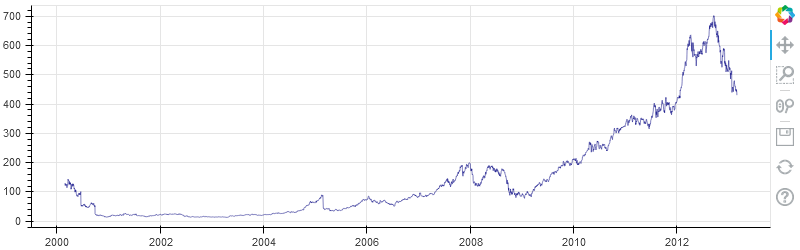

In [52]:
from IPython.display import Image
Image('plot.png')

### SVG Export
Bokeh can also generate SVG output in the browser, instead of rendering to HTML canvas. This is accomplished by setting `output_backend='svg'` on a figure. This can be be used to generate SVGs in `output_file` HTML files, or in content emebdded with `components`. It can also be used with the `export_svgs` function to save `.svg` files. Note that an SVG is created for *each canvas*. It is not possible to capture entire layouts or widgets in SVG output. 

***Important Note:*** *There a currently some known issue with SVG output, it may not work for all use-cases*

In [53]:
from bokeh.io import export_svgs

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime", output_backend='svg')
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_svgs(p, filename="plot.svg")

['plot.svg']

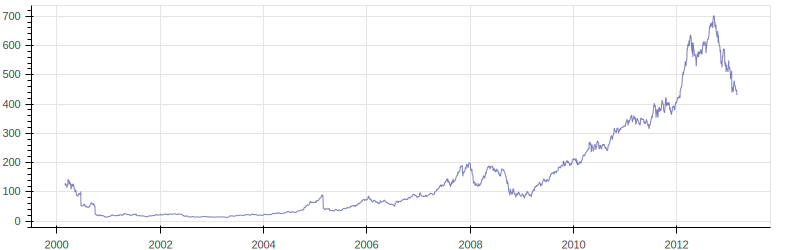

In [54]:
from IPython.display import SVG
SVG('plot.svg')

## Displaying in the Notebook

The first way to embed Bokeh output is in the Jupyter Notebooks, as we have already, seen. As a reminder, the cell below will generate a plot inline as output, because we executed `output_notebook` above.

In [55]:
import pandas as pd
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL
df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])
df = pd.DataFrame(AAPL) 
#df['date']
#Name: date, Length: 3270, dtype: object
df['date'] = pd.to_datetime(df['date'])
#df['date']
#Name: date, Length: 3270, dtype: datetime64[ns]
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)


from bokeh.io import output_notebook, show
output_notebook()
show(p)

Loading BokehJS ...

## Saving to an HTML File

`output_file(...)` 

In [56]:
import pandas as pd
from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL
df = pd.DataFrame(AAPL) 
#df['date']
#Name: date, Length: 3270, dtype: object
df['date'] = pd.to_datetime(df['date'])
#df['date']
#Name: date, Length: 3270, dtype: datetime64[ns]
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)


from bokeh.io import output_file, show
output_file("p.html")
show(p) 
# save(p) will save without opening a new browser tab

 It is important to note that `output_file` initiates a *persistent mode of operation*. That is, all subsequent calls to show will generate output to the specified file. We can "reset" where output will go by calling `reset_output`:

# Running Bokeh Applications

<ul>
    <li><pre>respond to UI and tool events generated in a browser with computations or queries using the full power of python</pre></li>
    <li><pre>automatically push updates the UI (i.e. widgets or plots), in a browser</pre></li>
    <li><pre>use periodic, timeout, and asychronous callbacks drive streaming updates</pre></li>
</ul>

In [57]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

## Bokeh Apps in Notebooks
method1: 

- make a function `modify_doc(doc)` 

- execute:
```func
show(modify_doc)
```

In [58]:
from bokeh.layouts import column
from bokeh.models import TextInput, Button, Paragraph

def modify_doc(doc):
    
    # create some widgets
    button = Button(label="Say HI")
    input = TextInput(value="Bokeh")
    output = Paragraph()

    # add a callback to a widget
    def update():
        output.text = "Hello, " + input.value
    button.on_click(update)

    # create a layout for everything
    layout = column(button, input, output)

    # add the layout to curdoc
    doc.add_root(layout)
    
# In the notebook, just pass the function that defines the app to show
# You may need to supply notebook_url, e.g notebook_url="http://localhost:8889" 
show(modify_doc) 

## Bokeh Apps with `bokeh serve`
method2: 

- create a standard Python script and add all the bokeh content to the doc with a line like
```python
curdoc().add_root(layout)
```

- execute:
```bash
bokeh serve --show hello.py 
```

```python
# hello.py 

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models.widgets import TextInput, Button, Paragraph

# create some widgets
button = Button(label="Say HI")
input = TextInput(value="Bokeh")
output = Paragraph()

# add a callback to a widget
def update():
    output.text = "Hello, " + input.value
button.on_click(update)

# create a layout for everything
layout = column(button, input, output)

# add the layout to curdoc
curdoc().add_root(layout)
```

## Linking Plots and Widgets

In [59]:
from numpy.random import random

from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, TextInput

# random data
def get_data(N):
    return dict(x=random(size=N), y=random(size=N), r=random(size=N) * 0.03)

COLORS = ["black", "firebrick", "navy", "olive", "goldenrod"]

def modify_doc(doc):
    source = ColumnDataSource(data=get_data(200))

    p = figure(tools="", toolbar_location=None)
    r = p.circle(x='x', y='y', radius='r', source=source,
                 color="navy", alpha=0.6, line_color="white")

    # selected properties(set default)
    select = Select(title="Color", value="navy", options=COLORS)
    input = TextInput(title="Number of points", value="200")

    def update_color(attrname, old, new):
        r.glyph.fill_color = select.value
    select.on_change('value', update_color)

    def update_points(attrname, old, new):
        N = int(input.value)
        source.data = get_data(N)
    input.on_change('value', update_points)

    layout = column(row(select, input, width=400), row(p))

    doc.add_root(layout)

show(modify_doc)